In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [3]:
def fpr(y_true,y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    fpr=fp/(fp+tn)
    return(fpr)

In [4]:
additional_metrics = [fpr]
loss_function = BinaryCrossentropy()
number_of_epochs = 10
optimizer = Adam()
verbosity_mode = 1
layer_size = 10

In [5]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [8]:
m=75000
n=25000
r=0.5

In [9]:
data=np.empty(n,dtype=int)
for i in range(0,n):
    data[i]=random.randint(0, 100000000)

In [10]:
mean = sum(data)/len(data)
std = np.std(data)
print(mean)
print(std)

77598.4516
28914501.318129987
<ipython-input-10-7f0f3a9e79f6>:1: RuntimeWarning: overflow encountered in long_scalars
  mean = sum(data)/len(data)


In [11]:
new_data = []
for x in data:
    new_data+=[(x-mean)/std]

In [12]:
x = []
for i in new_data:
    x+=[[i]]
x_train = np.array(x)
y = []
for i in range(0,n):
    if(i<int(n*r)):
        y+=[[1]]
    else:
        y+=[[0]]
y_train = np.array(y)
print(x_train)
print(y_train)

[[1.60725088]
 [1.55304766]
 [0.78953931]
 ...
 [2.60014657]
 [1.70385195]
 [0.28262931]]
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [13]:
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Epoch 1/10
782/782 [==============================] - 2s 931us/step - loss: 0.7107 - fpr: 0.4739
Epoch 2/10
782/782 [==============================] - 1s 646us/step - loss: 0.6937 - fpr: 0.3683
Epoch 3/10
782/782 [==============================] - 1s 757us/step - loss: 0.6936 - fpr: 0.3749
Epoch 4/10
782/782 [==============================] - 1s 841us/step - loss: 0.6935 - fpr: 0.4030
Epoch 5/10
782/782 [==============================] - 1s 948us/step - loss: 0.6935 - fpr: 0.4403
Epoch 6/10
782/782 [==============================] - 1s 808us/step - loss: 0.6933 - fpr: 0.4410
Epoch 7/10
782/782 [==============================] - 1s 840us/step - loss: 0.6934 - fpr: 0.3718
Epoch 8/10
782/782 [==============================] - 1s 738us/step - loss: 0.6934 - fpr: 0.4284
Epoch 9/10
782/782 [==============================] - 1s 662us/step - loss: 0.6933 - fpr: 0.4355
Epoch 10/10
782/782 [==============================] - 0s 594us/step - loss: 0.6934 - fpr: 0.3940


In [14]:
import matplotlib.pyplot as plt

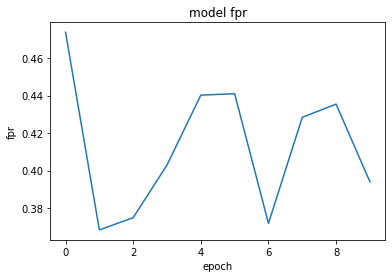

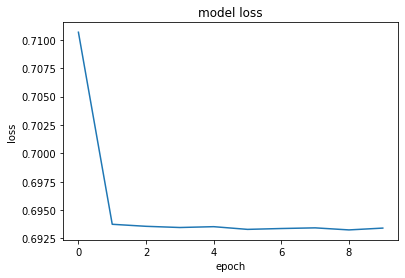

In [15]:
plt.plot(history.history['fpr'])
plt.title('model fpr')
plt.ylabel('fpr')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

In [16]:
number_of_epochs = 10
layer_size = 50

In [17]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Epoch 1/10
782/782 [==============================] - 1s 574us/step - loss: 0.6943 - fpr: 0.4910
Epoch 2/10
782/782 [==============================] - 1s 762us/step - loss: 0.6935 - fpr: 0.3892
Epoch 3/10
782/782 [==============================] - 0s 556us/step - loss: 0.6936 - fpr: 0.4257
Epoch 4/10
782/782 [==============================] - 0s 562us/step - loss: 0.6934 - fpr: 0.4059
Epoch 5/10
782/782 [==============================] - 0s 568us/step - loss: 0.6936 - fpr: 0.4239
Epoch 6/10
782/782 [==============================] - 0s 566us/step - loss: 0.6936 - fpr: 0.3883
Epoch 7/10
782/782 [==============================] - 0s 561us/step - loss: 0.6934 - fpr: 0.4393
Epoch 8/10
782/782 [==============================] - 0s 573us/step - loss: 0.6935 - fpr: 0.4206
Epoch 9/10
782/782 [==============================] - 0s 569us/step - loss: 0.6934 - fpr: 0.4267
Epoch 10/10
782/782 [==============================] - 1s 747us/step - loss: 0.6933 - fpr: 0.4234


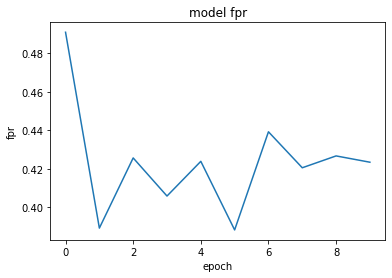

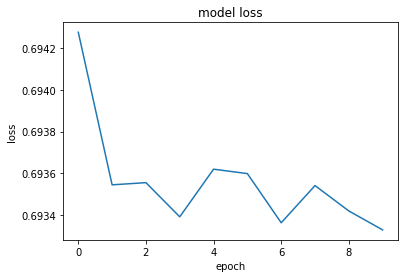

In [21]:
plt.plot(history.history['fpr'])
plt.title('model fpr')
plt.ylabel('fpr')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=50

In [22]:
layer_size = 200
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 1s 757us/step - loss: 0.6941 - fpr: 0.3973
Epoch 2/10
782/782 [==============================] - 1s 855us/step - loss: 0.6936 - fpr: 0.4643
Epoch 3/10
782/782 [==============================] - 1s 750us/step - loss: 0.6935 - fpr: 0.3937
Epoch 4/10
782/782 [==============================] - 0s 638us/step - loss: 0.6934 - fpr: 0.3800
Epoch 5/10
782/782 [==============================] - 1s 759us/step - loss: 0.6933 - fpr: 0.3769
Epoch 6/10
782/782 [=============

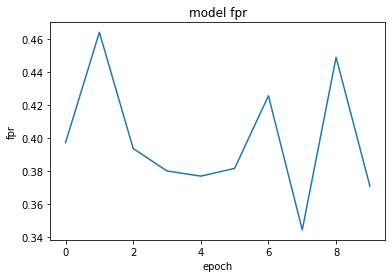

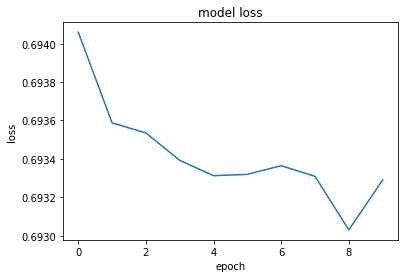

In [23]:
plt.plot(history.history['fpr'])
plt.title('model fpr')
plt.ylabel('fpr')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=200

In [24]:
number_of_epochs = 30
layer_size = 1000
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              2000      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
782/782 [==============================] - 1s 791us/step - loss: 0.6945 - fpr: nan
Epoch 2/30
782/782 [==============================] - 1s 1ms/step - loss: 0.6932 - fpr: 0.4408
Epoch 3/30
782/782 [==============================] - 1s 1ms/step - loss: 0.6932 - fpr: 0.4683
Epoch 4/30
782/782 [==============================] - 1s 971us/step - loss: 0.6932 - fpr: 0.3821
Epoch 5/30
782/782 [==============================] - 1s 707us/step - loss: 0.6931 - fpr: 0.4399
Epoch 6/30
782/782 [================

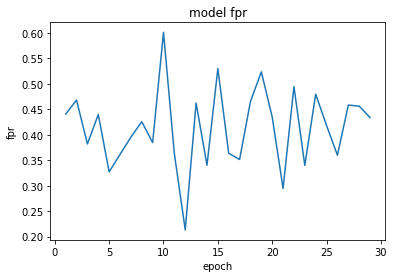

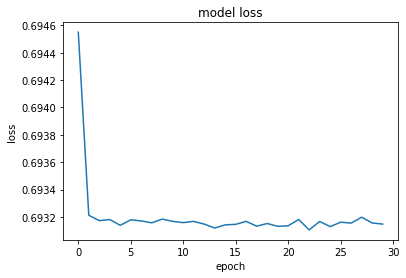

In [25]:
plt.plot(history.history['fpr'])
plt.title('model fpr')
plt.ylabel('fpr')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=1000

In [26]:
number_of_epochs = 30
layer_size = 10000
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10000)             20000     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 10001     
Total params: 30,001
Trainable params: 30,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
782/782 [==============================] - 2s 2ms/step - loss: 0.6938 - fpr: 0.4465
Epoch 2/30
782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - fpr: 0.5654
Epoch 3/30
782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - fpr: 0.5878
Epoch 4/30
782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - fpr: 0.2377
Epoch 5/30
782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - fpr: 0.7434
Epoch 6/30
782/782 [=================

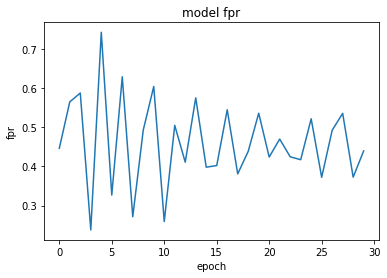

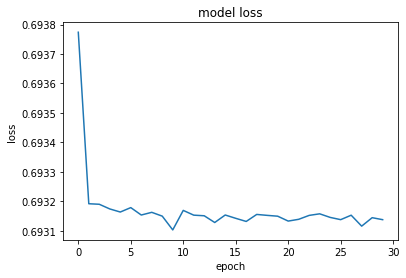

In [27]:
plt.plot(history.history['fpr'])
plt.title('model fpr')
plt.ylabel('fpr')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size= 10000

In [28]:
layer_size_1 = 100
layer_size_2 = 100
model = Sequential()
model.add(Dense(layer_size_1,input_dim=1,activation='relu'))
model.add(Dense(layer_size_2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
782/782 [==============================] - 1s 797us/step - loss: 0.6940 - fpr: 0.5464
Epoch 2/30
782/782 [==============================] - 1s 791us/step - loss: 0.6932 - fpr: 0.3941
Epoch 3/30
782/782 [==============================] - 1s 773us/step - loss: 0.6932 - fpr: 0.5286
Epoch 4/30
782/782 [==============================] - 1s 789us/step - loss: 0.6932 - fpr:

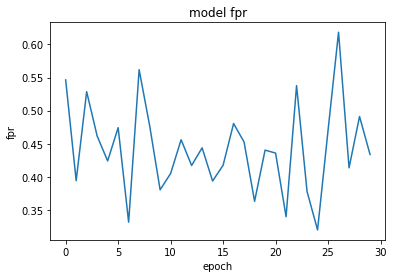

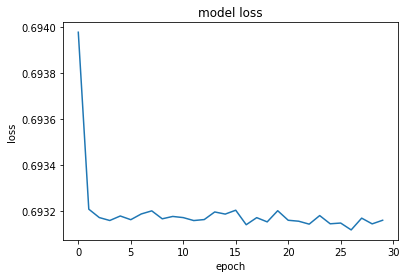

In [29]:
plt.plot(history.history['fpr'])
plt.title('model fpr')
plt.ylabel('fpr')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Sizes = 100,100

In [30]:
layer_size_1 = 100
layer_size_2 = 100
layer_size_3 = 100
layer_size_4 = 100
layer_size_5 = 100
number_of_epochs = 20
model = Sequential()
model.add(Dense(layer_size_1,input_dim=1,activation='relu'))
model.add(Dense(layer_size_2,activation='relu'))
model.add(Dense(layer_size_3,activation='relu'))
model.add(Dense(layer_size_4,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 40,701
Trainable params: 40,701
Non-trainable params: 0
__________________________________________________

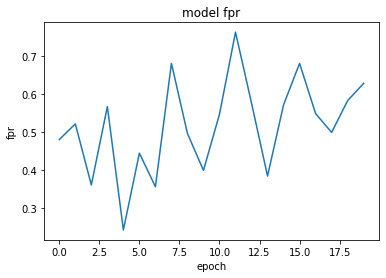

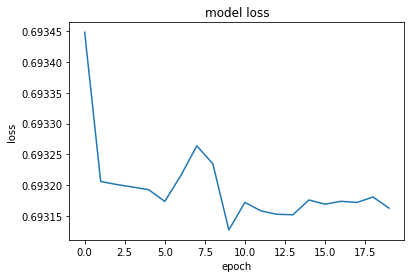

In [31]:
plt.plot(history.history['fpr'])
plt.title('model fpr')
plt.ylabel('fpr')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Sizes = 100 x 5

In [32]:
layer_size_1 = 100
layer_size_2 = 100
layer_size_3 = 100
layer_size_4 = 100
layer_size_5 = 100
number_of_epochs = 20
model = Sequential()
model.add(Dense(layer_size_1,input_dim=1,activation='relu'))
model.add(Dense(layer_size_2,activation='relu'))
model.add(Dense(layer_size_3,activation='relu'))
model.add(Dense(layer_size_4,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)              

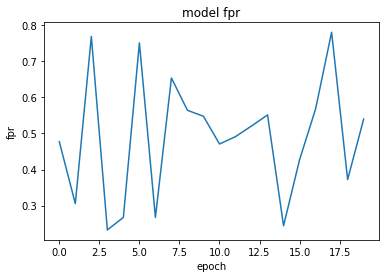

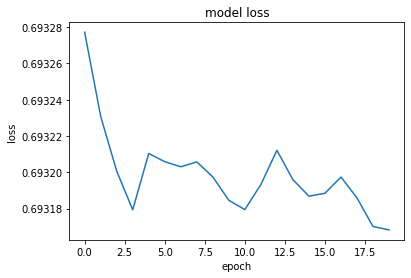

In [33]:
plt.plot(history.history['fpr'])
plt.title('model fpr')
plt.ylabel('fpr')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Sizes = 100 x 30

In [34]:
layer_size_1 = 100
layer_size_2 = 100
layer_size_3 = 200
layer_size_4 = 300
layer_size_5 = 500
number_of_epochs = 50
model = Sequential()
model.add(Dense(layer_size_1,input_dim=1,activation='relu'))
model.add(Dense(layer_size_2,activation='relu'))
model.add(Dense(layer_size_3,activation='relu'))
model.add(Dense(layer_size_4,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(layer_size_5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_51 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_52 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_53 (Dense)             (None, 300)               60300     
_________________________________________________________________
dense_54 (Dense)             (None, 500)               150500    
_________________________________________________________________
dense_55 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_56 (Dense)             (None, 500)              

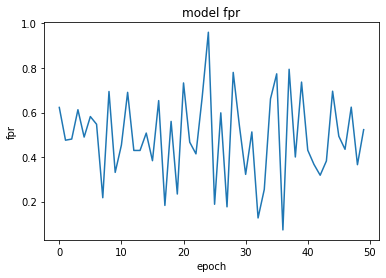

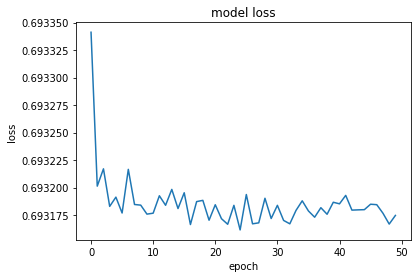

In [35]:
plt.plot(history.history['fpr'])
plt.title('model fpr')
plt.ylabel('fpr')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Sizes = 100,100,200,300, (500 x 26)

In [16]:
class BloomFilter:
    
    def __init__(self, size, hash_count):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        
    def add(self, num):
        for seed in range(1,self.hash_count+1):
            result = mmh3.hash(str(num), seed) % self.size
            self.bit_array[result] = 1
            
    def lookup(self, num):
        for seed in range(1,self.hash_count+1):
            result = mmh3.hash(str(num), seed) % self.size
            if self.bit_array[result] == 0:
                return False
        return True

#adds ratio r of an array of random integers of size n to bloom filter bf(input : bf,size,ratio; output: data array)
def addrandom(bf,n,r):
    data=np.empty(n,dtype=int)
    for i in range(0,n):
        data[i]=random.randint(0, 100000000)
    for j in range(0,int(n*r)):
        bf.add(data[j]);
    return data

#(Input:bloom filter,number array,ratio of positives; Output:(-1) for false negative, otherwise fpr)
def fpr(bf,nums,r):
    for i in range(int(len(nums)*r)):
        if(bf.lookup(nums[i])==False):
            print(nums[i])
            return -1
    count = 0
    for i in range(int(len(nums)*r),len(nums)):
        if(bf.lookup(nums[i])==True):
            count+=1
    return count/(len(nums)-int(len(nums)*r))

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k

#(Input:size of bloom filter, number of hash functions, total numbers, ratio of numbers inserted; Output: fpr)
def find_fpr(m,k,n,r):
    bf=BloomFilter(m,k)
    data=addrandom(bf,n,r)
    return fpr(bf,data,r)

#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    k=eff_k(m,n,r)
    find_fpr(m,k,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

In [17]:
def load_bloom(data_x,data_y,bf,n):
    for i in range(0,n):
        if((model.predict(data_x[i])[0]<0.5)and(data_y[i]==1)):
                bf.add(data_x[i])
    return

In [18]:
#m=75000
#n=25000
#r=0.5
k=eff_k(m,n,r)
bf=BloomFilter(m,k)

In [19]:
load_bloom(x_train,y_train,bf,n)

In [21]:
def lookup_model(data,bf):
        if(model.predict(data)[0]<0.5):
            if(bf.lookup(data)==False):
                return False
            else: return True

In [24]:
lookup_model(x_train[0],bf)

True

In [29]:
def calculate_fpr(bf,x_train,y_train):
    np=0
    for i in range(len(x_train)):
        if((lookup_model(x_train[i],bf)==True) and y_train[i]==0):
            np+=1
            continue
        if((lookup_model(x_train[i],bf)==False) and y_train[i]==1):
            return -1
    neg=len(y_train)-K.sum(y_train)
    return np/neg

In [30]:
calculate_fpr(bf,x_train,y_train)

0.026